In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
school = pd.read_excel('https://query.data.world/s/7oflhuppplq43hupfabmd5m63k3ora' ,sheet_name='school_dim')
conference = pd.read_excel('https://query.data.world/s/7oflhuppplq43hupfabmd5m63k3ora' ,sheet_name='conference_dim')
finance1 = pd.read_excel('https://query.data.world/s/6acfmhcuttxo7bwlkbvdecotcj4kgu' , sheet_name='finances_fact')

finance2 = finance1[['IPEDS ID','Year','FBS Conference','NCAA Subdivision','Excess Transfers Back','Total Expenses','Total Revenues']].loc[(finance1['FBS Conference'] != 'FBS Total') & (finance1['FBS Conference'].notna()) & (finance1['NCAA Subdivision'] == 'Football Bowl Subdivision')]
finance2['Total Profit'] = finance1['Total Revenues'] - finance1['Total Expenses'] + finance1['Excess Transfers Back']

In [12]:
df = pd.merge(pd.merge(finance2, school, how="left", on=["IPEDS ID", "IPEDS ID"]), conference, how="left", on=["FBS Conference", "FBS Conference"])
df.head()

,IPEDS ID,Year,FBS Conference,NCAA Subdivision,Excess Transfers Back,Total Expenses,Total Revenues,Total Profit,School,School Abb,Conference Abb
0,197869.0,2017,Sun Belt Conference,Football Bowl Subdivision,0.0,35065566.0,35058621.0,-6945.0,Appalachian State University,APP,SUN
1,104151.0,2017,Pacific-12 Conference,Football Bowl Subdivision,0.0,98825395.0,101579860.0,2754465.0,Arizona State University,ASU,PAC12
2,106458.0,2017,Sun Belt Conference,Football Bowl Subdivision,0.0,39459027.0,39459027.0,0.0,Arkansas State University,ARST,SUN
3,100858.0,2017,Southeastern Conference,Football Bowl Subdivision,0.0,132885979.0,147511034.0,14625055.0,Auburn University,AUB,SEC
4,150136.0,2017,Mid-American Conference,Football Bowl Subdivision,0.0,27410745.0,26098565.0,-1312180.0,Ball State University,BALL,MAC


In [13]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '$%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])


Total_Expenses =  human_format(df['Total Expenses'].sum())
Total_Revenues = human_format(df['Total Revenues'].sum())
Total_Profit = human_format(df['Total Profit'].sum())

sort_df = df.groupby('Conference Abb').sum(numeric_only=True)[['Total Expenses', 'Total Revenues', 'Total Profit']]


te_df = sort_df.sort_values(['Total Expenses'], ascending=False).reset_index()
tr_df = sort_df.sort_values(['Total Revenues'], ascending=False).reset_index()
tp_df = sort_df.sort_values(['Total Profit'], ascending=False).reset_index()

## **NCAA Revenue & Expense** $\color{red}{\text{|}}$ Summary

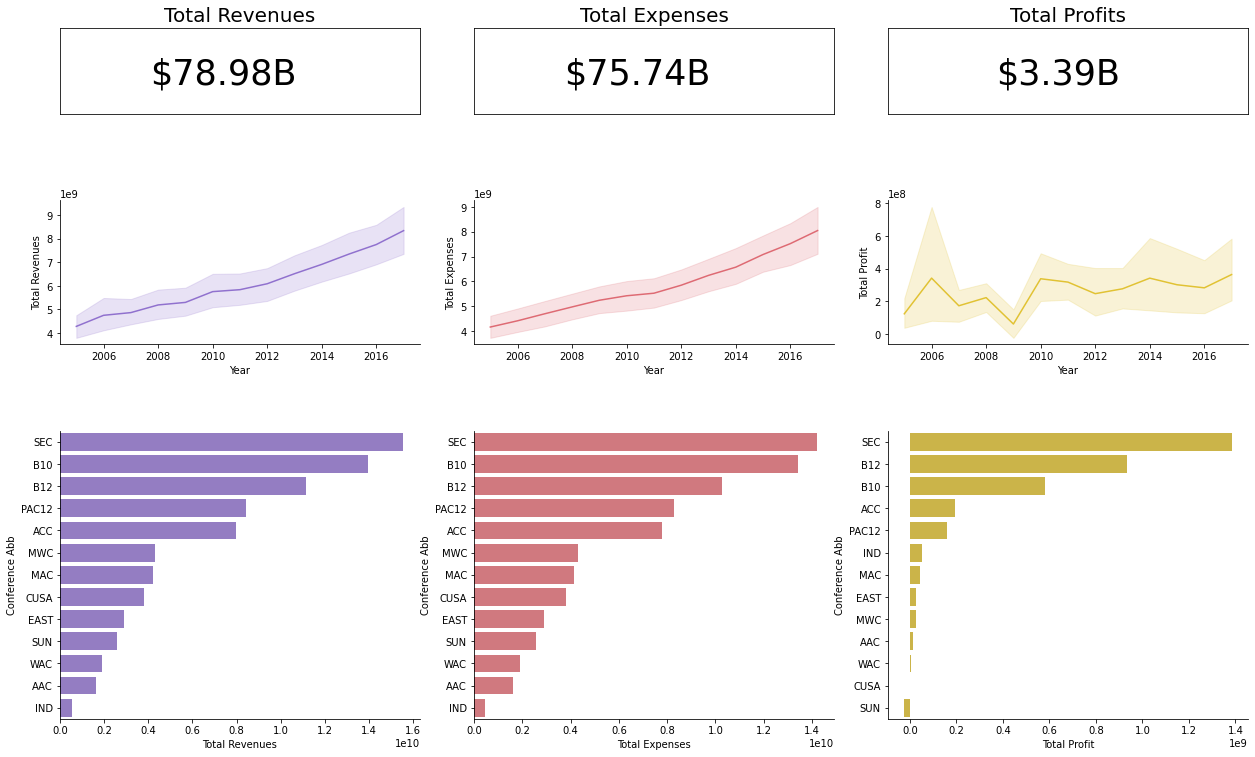

In [14]:
#@title

fig = plt.figure(figsize=(5,4))


tr_df.sort_values(['Total Revenues'], ascending=False).reset_index()
ax1b = fig.add_axes([0,0.5,1,1])
#ax1b.set_title('Total Expenses')
sns.barplot(y='Conference Abb',x='Total Revenues',data=tr_df,estimator=np.sum,color='#9071CE')

te_df.sort_values(['Total Expenses'], ascending=False).reset_index()
ax2b = fig.add_axes([1.15,0.5,1,1])
#ax2b.set_title('Total Profit')
sns.barplot(y='Conference Abb',x='Total Expenses',data=te_df,estimator=np.sum,color='#DE6A73')

tp_df.sort_values(['Total Profit'], ascending=False).reset_index()
ax3b = fig.add_axes([2.3,0.5,1,1])
#ax3b.set_title('Total Profit')
splot=sns.barplot(y='Conference Abb',x='Total Profit',data=tp_df,estimator=np.sum,color='#E1C233')


ax1a = fig.add_axes([0,1.8,1,0.5])
#ax1a.set_title('Total Expenses')
sns.lineplot(x='Year',y='Total Revenues',data=df,estimator=np.sum,color='#9071CE')

ax2a = fig.add_axes([1.15,1.8,1,0.5])
#ax2a.set_title('Total Revenues')
sns.lineplot(x='Year',y='Total Expenses',data=df,estimator=np.sum, color='#DE6A73')

ax3a = fig.add_axes([2.3,1.8,1,0.5])
#ax3a.set_title('Total Profit')
sns.lineplot(x='Year',y='Total Profit',data=df,estimator=np.sum, color='#E1C233')

sns.despine()

ax1 = fig.add_axes([0,2.6,1,0.3])
ax1.set_title('Total Revenues',fontsize=20)
ax1.text(0.25, 0.35, Total_Revenues, transform=ax1.transAxes, fontsize=35)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2 = fig.add_axes([1.15,2.6,1,0.3])
ax2.set_title('Total Expenses',fontsize=20)
ax2.text(1.4, 0.35, Total_Expenses, transform=ax1.transAxes, fontsize=35)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3 = fig.add_axes([2.3,2.6,1,0.3])
ax3.set_title('Total Profits',fontsize=20)
ax3.text(2.6, 0.35, Total_Profit, transform=ax1.transAxes, fontsize=35)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
